### 데이터 경로
https://www.crimestats.or.kr/portal/stat/easyStatPage.do -> '소년범죄' 검색 -> '「범죄분석」DB 소년범죄자 부모관계' -> 검색기간: 2014년부터 2019년까지 선택 후 조회  

onedrive에서 온라인에서 보기 선택 후 1, 2행/F, Q, R 열 삭제  
google drive에 올린 후 파일->다운로드->쉼표로구분된값 저장  
'parental_absence'로 이름 변경

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fm = mp.font_manager.FontManager()         # 한글화
plt.rcParams['font.family'] = 'Malgun Gothic'
mp.rcParams['axes.unicode_minus'] = False # '-' 에러 방지

In [3]:
# object->float 데이터 변환 에러가 자꾸 발생해서 데이터 불러올 때 thousands = ',' 하니까 천 단위 구분 쉼표 없어지고 타입도 float으로 바뀜
df = pd.read_csv('Data/03_범죄유형별 소년범죄자 부모관계_김현화.csv', sep = ',', thousands = ',') 
df.head()

,No,자료시점,분류,분류.1,분류.2,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미상
0,1,2014년,계,계[입력치],계[입력치],52718.0,279.0,999.0,6767.0,715.0,6445.0,111.0,87.0,1864.0,7.0
1,2,2014년,형법범,형법범계[입력치],형법범계[입력치],42918.0,208.0,894.0,5803.0,610.0,5372.0,89.0,56.0,1623.0,5.0
2,3,2014년,형법범,재산범죄,재산범죄의 계[입력치],25061.0,129.0,645.0,3769.0,375.0,3120.0,62.0,37.0,1110.0,1.0
3,4,2014년,형법범,재산범죄,배임,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2014년,형법범,재산범죄,사기,4471.0,37.0,121.0,656.0,66.0,550.0,10.0,12.0,165.0,0.0


In [4]:
# 컬럼명 변경
df.rename(columns={df.columns[1]:'연도',
                          df.columns[3]:'범죄유형',
                          df.columns[4]:'범죄유형_상세'}, inplace=True)

In [5]:
# '연도'를 인덱스로 설정
df.set_index("연도", inplace = True)
# 'No' 컬럼 삭제
df = df.drop(['No'], axis=1).copy()
df.head(10)

,분류,범죄유형,범죄유형_상세,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미상
연도,,,,,,,,,,,,,
2014년,계,계[입력치],계[입력치],52718.0,279.0,999.0,6767.0,715.0,6445.0,111.0,87.0,1864.0,7.0
2014년,형법범,형법범계[입력치],형법범계[입력치],42918.0,208.0,894.0,5803.0,610.0,5372.0,89.0,56.0,1623.0,5.0
2014년,형법범,재산범죄,재산범죄의 계[입력치],25061.0,129.0,645.0,3769.0,375.0,3120.0,62.0,37.0,1110.0,1.0
2014년,형법범,재산범죄,배임,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014년,형법범,재산범죄,사기,4471.0,37.0,121.0,656.0,66.0,550.0,10.0,12.0,165.0,0.0
2014년,형법범,재산범죄,손괴,485.0,5.0,3.0,53.0,7.0,76.0,0.0,1.0,18.0,0.0
2014년,형법범,재산범죄,장물,631.0,1.0,4.0,66.0,5.0,64.0,6.0,0.0,25.0,0.0
2014년,형법범,재산범죄,절도,18424.0,83.0,506.0,2898.0,282.0,2296.0,45.0,19.0,874.0,1.0
2014년,형법범,재산범죄,횡령,1050.0,3.0,11.0,96.0,15.0,134.0,1.0,5.0,28.0,0.0


In [6]:
df.columns

Index(['분류', '범죄유형', '범죄유형_상세', '실(양)부모', '계부모', '실부계모', '실부무모', '실모계부',
       '실모무부', '계부무모', '계모무부', '무부모', '미상'],
      dtype='object')

In [7]:
# 데이터 타입 확인
df.dtypes

분류          object
범죄유형        object
범죄유형_상세     object
실(양)부모     float64
계부모        float64
실부계모       float64
실부무모       float64
실모계부       float64
실모무부       float64
계부무모       float64
계모무부       float64
무부모        float64
미상         float64
dtype: object

In [8]:
df.isnull().sum() # 결측치 개수 확인

분류         0
범죄유형       0
범죄유형_상세    0
실(양)부모     2
계부모        2
실부계모       2
실부무모       2
실모계부       2
실모무부       2
계부무모       2
계모무부       2
무부모        2
미상         2
dtype: int64

In [9]:
df = df.dropna() # 결측치 제거

In [10]:
print(df['범죄유형_상세'].unique())
print(len(df['범죄유형_상세'].unique()))

['계[입력치]' '형법범계[입력치]' '재산범죄의 계[입력치]' '배임' '사기' '손괴' '장물' '절도' '횡령'
 '강력범죄(흉악)의 계[입력치]' '강도' '방화' '살인' '성폭력' '강력범죄(폭력)의 계[입력치]' '공갈' '상해'
 '약취와 유인' '체포와 감금' '폭력행위등(단체등의구성,활동)' '폭력행위등(손괴,강요,주거침입등)' '폭행' '협박'
 '위조범죄의 계[입력치]' '문서' '유가증권인지우표' '인장' '통화' '공무원범죄의 계[입력치]' '수뢰' '증뢰' '직권남용'
 '직무유기' '풍속범죄의 계[입력치]' '기타음란행위' '도박과 복표' '신앙' '과실범죄의 계[입력치]' '과실치사상' '실화'
 '업무상과실치사상' '기타형법범죄의 계[입력치]' '공무방해' '공안을해하는죄' '교통방해' '권리행사방해' '내란의죄'
 '도주와범인은닉' '명예' '무고' '비밀침해' '신용업무경매' '위증과증거인멸' '유기' '음용수에관한죄' '일수와수리에관한죄'
 '주거침입' '기타' '특별법범의 계[입력치]' '개발제한구역의지정및관리에관한특별조치법' '개인정보보호법' '건축법'
 '게임산업진흥에관한법률' '경범죄처벌법' '공유재산및물품관리법' '공인중개사법' '공중위생관리법' '공직선거법'
 '교통사고처리특례법' '국민체육진흥법' '국토의계획및이용에관한법률' '근로기준법' '근로자퇴직급여보장법'
 '농수산물의원산지표시에관한법률' '농지법' '대기환경보전법' '대부업등의등록및금융이용자보호에관한법률' '도로교통법' '도로법'
 '마약류관리에관한법률' '병역법' '부정경쟁방지및영업비밀보호에관한법률' '부정수표단속법' '사행행위등규제및처벌특례법'
 '산림자원의조성및관리에관한법률' '산업안전보건법' '산지관리법' '상표법' '선박안전법' '선박직원법' '수산업법'
 '수산자원관리법' '물환경보전법' '식품위생법' '아동·청소년의성보호에관한법률(성매수등)'
 '아동·청소년의성보호에관한법률(음란물등)' '아동복지법' '여객자동차운수사업법' '여신전문금융업

In [11]:
# '범죄유형_상세'에서 '계'가 들어간 행 삭제
df1 = df[~df.범죄유형_상세.str.contains('계')].copy()
# 범죄유형별 합계 컬럼 추가
df1['합계'] = df1.sum(axis=1)
df1.head(10)

,분류,범죄유형,범죄유형_상세,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미상,합계
연도,,,,,,,,,,,,,,
2014년,형법범,재산범죄,배임,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014년,형법범,재산범죄,사기,4471.0,37.0,121.0,656.0,66.0,550.0,10.0,12.0,165.0,0.0,6088.0
2014년,형법범,재산범죄,손괴,485.0,5.0,3.0,53.0,7.0,76.0,0.0,1.0,18.0,0.0,648.0
2014년,형법범,재산범죄,장물,631.0,1.0,4.0,66.0,5.0,64.0,6.0,0.0,25.0,0.0,802.0
2014년,형법범,재산범죄,절도,18424.0,83.0,506.0,2898.0,282.0,2296.0,45.0,19.0,874.0,1.0,25428.0
2014년,형법범,재산범죄,횡령,1050.0,3.0,11.0,96.0,15.0,134.0,1.0,5.0,28.0,0.0,1343.0
2014년,형법범,강력범죄(흉악),강도,280.0,1.0,9.0,36.0,9.0,40.0,0.0,0.0,17.0,0.0,392.0
2014년,형법범,강력범죄(흉악),방화,125.0,0.0,2.0,12.0,2.0,11.0,0.0,1.0,1.0,0.0,154.0
2014년,형법범,강력범죄(흉악),살인,15.0,2.0,0.0,3.0,0.0,3.0,0.0,0.0,2.0,0.0,25.0


In [12]:
# 데이터 타입 확인
df1.dtypes

분류          object
범죄유형        object
범죄유형_상세     object
실(양)부모     float64
계부모        float64
실부계모       float64
실부무모       float64
실모계부       float64
실모무부       float64
계부무모       float64
계모무부       float64
무부모        float64
미상         float64
합계         float64
dtype: object

In [13]:
pdf1 = pd.pivot_table(df1,                       # 피벗할 데이터프레임
                     index = '범죄유형_상세',    # 행 위치에 들어갈 열
                     columns = '연도',           # 열 위치에 들어갈 열
                     values = '합계')            # 데이터로 사용할 열
pdf1

연도,2014년,2015년,2016년,2017년,2018년,2019년
범죄유형_상세,,,,,,
강도,392.0,408.0,306.0,232.0,208.0,356.0
개발제한구역의지정및관리에관한특별조치법,0.0,0.0,0.0,0.0,0.0,0.0
개인정보보호법,5.0,3.0,1.0,9.0,1.0,3.0
건축법,0.0,0.0,0.0,0.0,0.0,0.0
게임산업진흥에관한법률,116.0,105.0,117.0,76.0,80.0,56.0
...,...,...,...,...,...,...
풍속영업의규제에관한법률,0.0,1.0,0.0,1.0,0.0,0.0
학원의설립운영및과외교습에관한법률,0.0,0.0,0.0,1.0,0.0,0.0
협박,257.0,292.0,346.0,441.0,572.0,690.0


In [14]:
# 연도별 합계 컬럼 추가
pdf1['연도별_합계'] = pdf1.sum(axis=1)
pdf1.head()

연도,2014년,2015년,2016년,2017년,2018년,2019년,연도별_합계
범죄유형_상세,,,,,,,
강도,392.0,408.0,306.0,232.0,208.0,356.0,1902.0
개발제한구역의지정및관리에관한특별조치법,0.0,0.0,0.0,0.0,0.0,0.0,0.0
개인정보보호법,5.0,3.0,1.0,9.0,1.0,3.0,22.0
건축법,0.0,0.0,0.0,0.0,0.0,0.0,0.0
게임산업진흥에관한법률,116.0,105.0,117.0,76.0,80.0,56.0,550.0


In [15]:
# 2014년부터 2019년까지 합계 기준 내림차순 정렬 => 상위 5개 범죄 유형: 절도, 폭행, 사기, 상해, 도로교통법 (위반)
result = pdf1.sort_values('연도별_합계',ascending=False)
result.head()

연도,2014년,2015년,2016년,2017년,2018년,2019년,연도별_합계
범죄유형_상세,,,,,,,
절도,25428.0,20576.0,21886.0,19417.0,16431.0,16662.0,120400.0
폭행,7042.0,6652.0,7655.0,8318.0,8577.0,8077.0,46321.0
사기,6088.0,6384.0,6121.0,5188.0,6001.0,7019.0,36801.0
상해,6754.0,5570.0,6097.0,6222.0,5242.0,4782.0,34667.0
도로교통법,5082.0,4763.0,5390.0,5702.0,4431.0,4474.0,29842.0


In [16]:
# 연도를 x축으로 하는 그래프 보기 위해 행렬 전치 
result1 = result.head().T
result1

범죄유형_상세,절도,폭행,사기,상해,도로교통법
연도,,,,,
2014년,25428.0,7042.0,6088.0,6754.0,5082.0
2015년,20576.0,6652.0,6384.0,5570.0,4763.0
2016년,21886.0,7655.0,6121.0,6097.0,5390.0
2017년,19417.0,8318.0,5188.0,6222.0,5702.0
2018년,16431.0,8577.0,6001.0,5242.0,4431.0
2019년,16662.0,8077.0,7019.0,4782.0,4474.0
연도별_합계,120400.0,46321.0,36801.0,34667.0,29842.0


Text(0, 0.5, '소년범죄수')

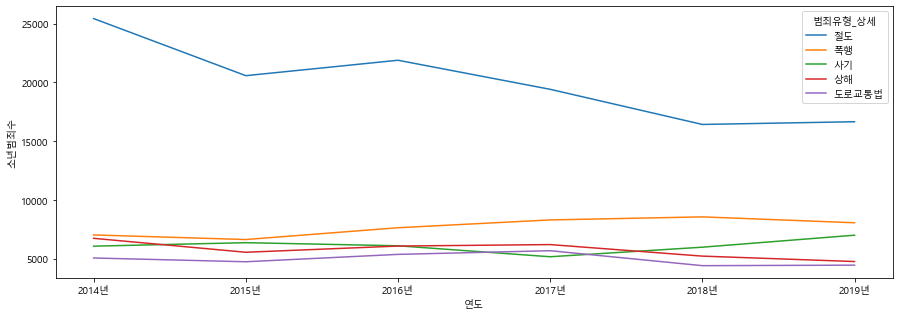

In [17]:
# 연도별_합계 행 제거하고 연도별 상위 5개 소년범죄 추이 선형 그래프로 시각화
remove_total = result1.drop(['연도별_합계'])
remove_total.plot(figsize=(15, 5))
plt.ylabel('소년범죄수')

In [18]:
# 부모관계 분석
df.head(10)

,분류,범죄유형,범죄유형_상세,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미상
연도,,,,,,,,,,,,,
2014년,계,계[입력치],계[입력치],52718.0,279.0,999.0,6767.0,715.0,6445.0,111.0,87.0,1864.0,7.0
2014년,형법범,형법범계[입력치],형법범계[입력치],42918.0,208.0,894.0,5803.0,610.0,5372.0,89.0,56.0,1623.0,5.0
2014년,형법범,재산범죄,재산범죄의 계[입력치],25061.0,129.0,645.0,3769.0,375.0,3120.0,62.0,37.0,1110.0,1.0
2014년,형법범,재산범죄,배임,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2014년,형법범,재산범죄,사기,4471.0,37.0,121.0,656.0,66.0,550.0,10.0,12.0,165.0,0.0
2014년,형법범,재산범죄,손괴,485.0,5.0,3.0,53.0,7.0,76.0,0.0,1.0,18.0,0.0
2014년,형법범,재산범죄,장물,631.0,1.0,4.0,66.0,5.0,64.0,6.0,0.0,25.0,0.0
2014년,형법범,재산범죄,절도,18424.0,83.0,506.0,2898.0,282.0,2296.0,45.0,19.0,874.0,1.0
2014년,형법범,재산범죄,횡령,1050.0,3.0,11.0,96.0,15.0,134.0,1.0,5.0,28.0,0.0


In [19]:
# 연도별 계 확인
df2 = df[df['분류'].str.contains('계')]
df2

,분류,범죄유형,범죄유형_상세,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미상
연도,,,,,,,,,,,,,
2014년,계,계[입력치],계[입력치],52718.0,279.0,999.0,6767.0,715.0,6445.0,111.0,87.0,1864.0,7.0
2015년,계,계[입력치],계[입력치],47733.0,251.0,864.0,5480.0,661.0,5516.0,85.0,65.0,1619.0,8.0
2016년,계,계[입력치],계[입력치],51652.0,225.0,845.0,5649.0,663.0,5976.0,93.0,77.0,1620.0,3.0
2017년,계,계[입력치],계[입력치],49891.0,221.0,715.0,5003.0,607.0,5554.0,65.0,70.0,1367.0,168.0
2018년,계,계[입력치],계[입력치],49896.0,163.0,445.0,3329.0,377.0,3692.0,46.0,41.0,1001.0,8.0
2019년,계,계[입력치],계[입력치],51197.0,115.0,369.0,2979.0,344.0,3506.0,39.0,35.0,802.0,2.0


In [20]:
# 실(양)부모가 없는 경우만 살펴보기 
# 필요 없는 컬럼 삭제
df2 = df2.drop(['분류', '범죄유형', '범죄유형_상세'], axis=1).copy()
df2

,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미상
연도,,,,,,,,,,
2014년,52718.0,279.0,999.0,6767.0,715.0,6445.0,111.0,87.0,1864.0,7.0
2015년,47733.0,251.0,864.0,5480.0,661.0,5516.0,85.0,65.0,1619.0,8.0
2016년,51652.0,225.0,845.0,5649.0,663.0,5976.0,93.0,77.0,1620.0,3.0
2017년,49891.0,221.0,715.0,5003.0,607.0,5554.0,65.0,70.0,1367.0,168.0
2018년,49896.0,163.0,445.0,3329.0,377.0,3692.0,46.0,41.0,1001.0,8.0
2019년,51197.0,115.0,369.0,2979.0,344.0,3506.0,39.0,35.0,802.0,2.0


In [21]:
# 전체 행 추가
df2.loc['전체'] = df2.sum(axis=0)
df2

,실(양)부모,계부모,실부계모,실부무모,실모계부,실모무부,계부무모,계모무부,무부모,미상
연도,,,,,,,,,,
2014년,52718.0,279.0,999.0,6767.0,715.0,6445.0,111.0,87.0,1864.0,7.0
2015년,47733.0,251.0,864.0,5480.0,661.0,5516.0,85.0,65.0,1619.0,8.0
2016년,51652.0,225.0,845.0,5649.0,663.0,5976.0,93.0,77.0,1620.0,3.0
2017년,49891.0,221.0,715.0,5003.0,607.0,5554.0,65.0,70.0,1367.0,168.0
2018년,49896.0,163.0,445.0,3329.0,377.0,3692.0,46.0,41.0,1001.0,8.0
2019년,51197.0,115.0,369.0,2979.0,344.0,3506.0,39.0,35.0,802.0,2.0
전체,303087.0,1254.0,4237.0,29207.0,3367.0,30689.0,439.0,375.0,8273.0,196.0


In [22]:
df2_T = df2.T
df2_T

연도,2014년,2015년,2016년,2017년,2018년,2019년,전체
실(양)부모,52718.0,47733.0,51652.0,49891.0,49896.0,51197.0,303087.0
계부모,279.0,251.0,225.0,221.0,163.0,115.0,1254.0
실부계모,999.0,864.0,845.0,715.0,445.0,369.0,4237.0
실부무모,6767.0,5480.0,5649.0,5003.0,3329.0,2979.0,29207.0
실모계부,715.0,661.0,663.0,607.0,377.0,344.0,3367.0
실모무부,6445.0,5516.0,5976.0,5554.0,3692.0,3506.0,30689.0
계부무모,111.0,85.0,93.0,65.0,46.0,39.0,439.0
계모무부,87.0,65.0,77.0,70.0,41.0,35.0,375.0
무부모,1864.0,1619.0,1620.0,1367.0,1001.0,802.0,8273.0
미상,7.0,8.0,3.0,168.0,8.0,2.0,196.0


In [23]:
# 전체 기준 내림차순 정렬 
result2 = df2_T.sort_values('전체',ascending=False)
result2

연도,2014년,2015년,2016년,2017년,2018년,2019년,전체
실(양)부모,52718.0,47733.0,51652.0,49891.0,49896.0,51197.0,303087.0
실모무부,6445.0,5516.0,5976.0,5554.0,3692.0,3506.0,30689.0
실부무모,6767.0,5480.0,5649.0,5003.0,3329.0,2979.0,29207.0
무부모,1864.0,1619.0,1620.0,1367.0,1001.0,802.0,8273.0
실부계모,999.0,864.0,845.0,715.0,445.0,369.0,4237.0
실모계부,715.0,661.0,663.0,607.0,377.0,344.0,3367.0
계부모,279.0,251.0,225.0,221.0,163.0,115.0,1254.0
계부무모,111.0,85.0,93.0,65.0,46.0,39.0,439.0
계모무부,87.0,65.0,77.0,70.0,41.0,35.0,375.0
미상,7.0,8.0,3.0,168.0,8.0,2.0,196.0


In [24]:
sum(result2['전체'])

381124.0

In [32]:
# 비율 컬럼 추가
result2['비율'] = (result2['전체']/sum(result2['전체'])*100) # .round(2) 제거
result2

연도,2014년,2015년,2016년,2017년,2018년,2019년,전체,비율
실(양)부모,52718.0,47733.0,51652.0,49891.0,49896.0,51197.0,303087.0,79.524512
실모무부,6445.0,5516.0,5976.0,5554.0,3692.0,3506.0,30689.0,8.052235
실부무모,6767.0,5480.0,5649.0,5003.0,3329.0,2979.0,29207.0,7.663385
무부모,1864.0,1619.0,1620.0,1367.0,1001.0,802.0,8273.0,2.170685
실부계모,999.0,864.0,845.0,715.0,445.0,369.0,4237.0,1.111712
실모계부,715.0,661.0,663.0,607.0,377.0,344.0,3367.0,0.883440
계부모,279.0,251.0,225.0,221.0,163.0,115.0,1254.0,0.329027
계부무모,111.0,85.0,93.0,65.0,46.0,39.0,439.0,0.115186
계모무부,87.0,65.0,77.0,70.0,41.0,35.0,375.0,0.098393
미상,7.0,8.0,3.0,168.0,8.0,2.0,196.0,0.051427


In [33]:
result2['비율'].sum()

100.0

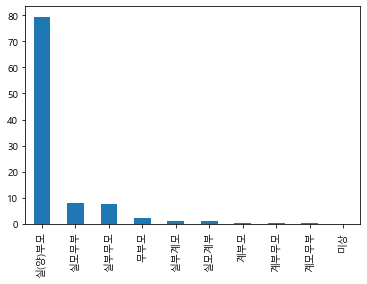

In [34]:
result2['비율'].plot(kind='bar')
plt.show()

In [35]:
# 내림차순 정렬
parent_top5 = result2['비율'].sort_values(ascending=False).head()
parent_top5

실(양)부모    79.524512
실모무부       8.052235
실부무모       7.663385
무부모        2.170685
실부계모       1.111712
Name: 비율, dtype: float64

In [40]:
parent_top5 = parent_top5.to_frame()

In [42]:
# '기타' 행 추가
parent_top5.loc['기타'] = 100 - parent_top5['비율'].sum()
parent_top5

,비율
실(양)부모,79.524512
실모무부,8.052235
실부무모,7.663385
무부모,2.170685
실부계모,1.111712
기타,1.477472


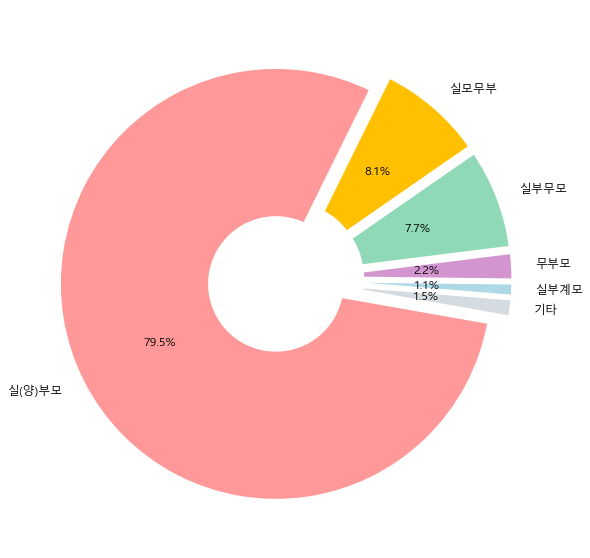

In [49]:
# plt.pie(데이터, 라벨, autopct(전체대비비율)=소수점표시, startangle(부채꼴 시작 각도), shadow(그림자 효과 유무), explode(돌출))

plt.figure(figsize=(10,10))
plt.rc('font', size=12)

ratio = parent_top5['비율'].tolist()
labels = parent_top5.index.tolist() # 인덱스 리스트로 추출 
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ADD8E6', '#D4DBE1'] 
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=-10, counterclock=False, explode=explode, colors=colors, wedgeprops=wedgeprops)
plt.show()

실부모 비율이 80%에 육박하며, 친부/친모가 한 명이라도 존재하는 가정으로 따지면 95%에 육박한다.  